In [116]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # 잘쓰면 트리모델만큼 좋은게 없다.
from sklearn.ensemble import RandomForestClassifier # 잘쓰면 트리모델만큼 좋은게 없다.

from sklearn.model_selection import GridSearchCV # 여러 파라미터를 바꿔가면서 적용시켜 최상의 모델은 구한다
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier # 잘쓰면 트리모델만큼 좋은게 없다.
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier # 잘쓰면 트리모델만큼 좋은게 없다.
from sklearn import metrics
from sklearn.datasets import load_breast_cancer

import xgboost
from xgboost import XGBClassifier

import graphviz
from sklearn.tree import export_graphviz
import time

matplotlib_inline.backend_inline.set_matplotlib_formats("retina") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

In [105]:
train = pd.read_csv("../datas/hr_data/hr_train_scaling.csv", index_col=0)
test = pd.read_csv("../datas/hr_data/hr_test_scaling.csv", index_col=0)

train


,job_satisfaction,working_hours,num_companies_worked,age,years_at_company,salary_increasing_rate,department_hr,department_rnd,department_sales,marital_status_etc,marital_status_married,marital_status_single,attrition
1274,1.000000,0.356223,0.111111,0.309524,0.325,0.558212,0.0,0.0,1.0,0.0,1.0,0.0,0
1080,0.333333,0.858369,0.888889,0.666667,0.575,0.492676,0.0,0.0,1.0,0.0,1.0,0.0,0
1387,0.000000,0.484979,0.000000,0.261905,0.150,0.468004,0.0,1.0,0.0,0.0,1.0,0.0,0
971,0.333333,0.227468,0.333333,0.785714,0.725,0.653046,0.0,1.0,0.0,0.0,0.0,1.0,0
62,0.666667,0.613734,0.555556,0.761905,0.725,0.494218,0.0,1.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,0.000000,0.712446,0.666667,0.452381,0.425,0.807247,0.0,1.0,0.0,0.0,1.0,0.0,0
192,0.666667,0.111588,0.333333,0.404762,0.200,0.535854,0.0,1.0,0.0,0.0,1.0,0.0,1
1014,0.333333,0.484979,0.222222,0.309524,0.225,0.451041,0.0,1.0,0.0,0.0,0.0,1.0,0
1284,0.666667,0.111588,0.777778,0.500000,0.225,0.821896,0.0,1.0,0.0,0.0,0.0,1.0,0


In [106]:
x_train = train.drop(columns=["attrition"])
y_train = train["attrition"]

x_test = test.drop(columns=["attrition"])
y_test = test["attrition"]

In [107]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1094, 12)
(1094,)
(365, 12)
(365,)


In [108]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
print("knn 정확도:",metrics.accuracy_score(pred_knn, y_test))

knn 정확도: 0.8328767123287671


In [109]:
def ran_search(params,iters,model = DecisionTreeClassifier(random_state=209)):
    model_base = RandomizedSearchCV(model,
                              params,
                              n_iter= iters,
                              cv = 5,
                              return_train_score=True,
                              n_jobs = -1,
                              random_state=97)
    print("현재 모델명:" , type(model))
    model_base.fit(x_train, y_train)

    print("최상 매개변수:", model_base.best_params_)
    print("최고 OOB 정확도:", model_base.best_score_)
    
    best_model = model_base.best_estimator_
    best_pred = best_model.predict(x_test)
    print("최고 정확도", metrics.accuracy_score(best_pred,y_test))


    return model_base, best_model

In [110]:
params = {
    "max_depth": [2, 3, 4],
    "max_features": ["sqrt","log2",None],
    "min_samples_leaf": [i for i in range(5,10,2)],
    "min_samples_split": [6,8],
}

ran_search(params,3,model=DecisionTreeClassifier(random_state=42))

현재 모델명: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
최상 매개변수: {'min_samples_split': 8, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_depth': 3}
최고 OOB 정확도: 0.8482677726111181
최고 정확도 0.8191780821917808


(RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                    n_iter=3, n_jobs=-1,
                    param_distributions={'max_depth': [2, 3, 4],
                                         'max_features': ['sqrt', 'log2', None],
                                         'min_samples_leaf': [5, 7, 9],
                                         'min_samples_split': [6, 8]},
                    random_state=97, return_train_score=True),
 DecisionTreeClassifier(max_depth=3, max_features='log2', min_samples_leaf=7,
                        min_samples_split=8, random_state=42))

In [111]:
_, best = ran_search(params,10,model=RandomForestClassifier(oob_score=True,random_state=42))

best.oob_score_

현재 모델명: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
최상 매개변수: {'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': None, 'max_depth': 3}
최고 OOB 정확도: 0.849197771354363
최고 정확도 0.8273972602739726


0.8491773308957953

In [112]:
estimates = {}

for i in range(100,500,50):
    _, best = ran_search(params,10,model=RandomForestClassifier(n_estimators=i,oob_score=True,random_state=42))
    estimates[i] = best

현재 모델명: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
최상 매개변수: {'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': None, 'max_depth': 3}
최고 OOB 정확도: 0.849197771354363
최고 정확도 0.8273972602739726
현재 모델명: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
최상 매개변수: {'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': None, 'max_depth': 3}
최고 OOB 정확도: 0.8482845293452307
최고 정확도 0.8301369863013699
현재 모델명: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
최상 매개변수: {'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': None, 'max_depth': 3}
최고 OOB 정확도: 0.8501110133634955
최고 정확도 0.8273972602739726
현재 모델명: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
최상 매개변수: {'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': None, 'max_depth': 3}
최고 OOB 정확도: 0.8519374973817604
최고 정확도 0.8273972602739726
현재 모델명: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
최상 매개변수: {'min_samples_split': 6, 'min_samples_leaf': 7, 'max_f

In [113]:
for i in estimates:
    print(estimates[i].oob_score_)

estimates[150].get_params

0.8491773308957953
0.8473491773308958
0.8482632541133455
0.8473491773308958
0.8464351005484461
0.8482632541133455
0.8446069469835467
0.8464351005484461


<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=3, max_features=None, min_samples_leaf=7,
                       min_samples_split=6, n_estimators=150, oob_score=True,
                       random_state=42)>

In [114]:
model_ = RandomForestClassifier(max_depth=4, max_features='log2', min_samples_leaf=5,
                       min_samples_split=8, n_estimators=150, oob_score=True,
                       random_state=42)

model_.fit(x_train, y_train)
pred_best = model_.predict(x_test)
print(metrics.accuracy_score(pred_best,y_test))

0.8301369863013699


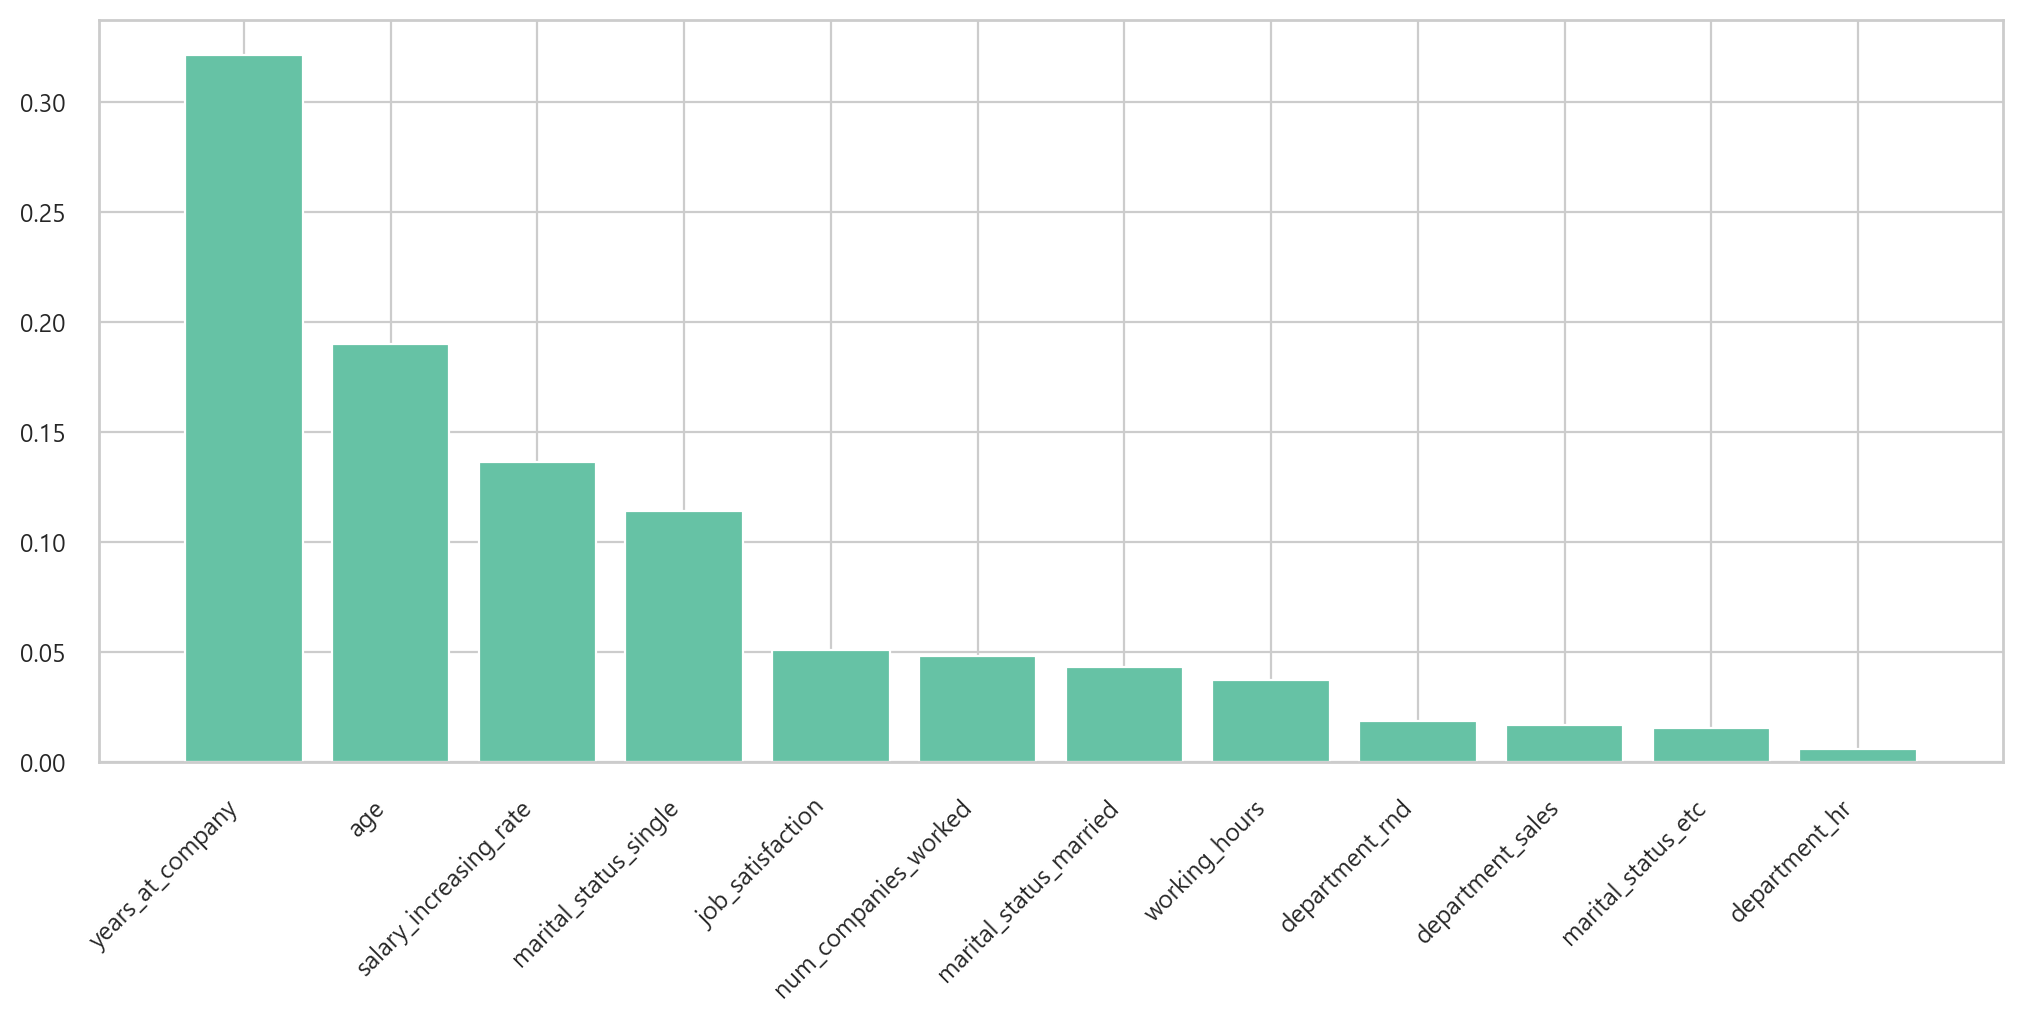

In [115]:
importances = {name: val for name, val in zip(model_.feature_names_in_, model_.feature_importances_)}
sorted_keys = sorted(importances, key=importances.get ,reverse=True)
sorted_values = [importances[key] for key in sorted_keys]

fig, ax = plt.subplots(1,1,figsize = (10,5))

ax.bar(sorted_keys,
       sorted_values)
plt.setp(ax.get_xticklabels(), ha = "right", rotation = 45);

XGBoo

In [119]:
xgb = XGBClassifier(objective= "binary:logistic")
xgb.fit(x_train,y_train)
pred_xgb = xgb.predict(x_test)
metrics.accuracy_score(pred_xgb, y_test)

0.8054794520547945

In [124]:
params = {"max_depth":[1, 2, 3],
          "learning_rate":np.arange(0.01,0.1,0.001),
          "n_estimators":np.arange(100,300,30)}

_ , model_best_XGB = ran_search(params=params,iters=100 ,model=xgb)

현재 모델명: <class 'xgboost.sklearn.XGBClassifier'>
최상 매개변수: {'n_estimators': 250, 'max_depth': 3, 'learning_rate': 0.03199999999999998}
최고 OOB 정확도: 0.858326002262159
최고 정확도 0.8301369863013699


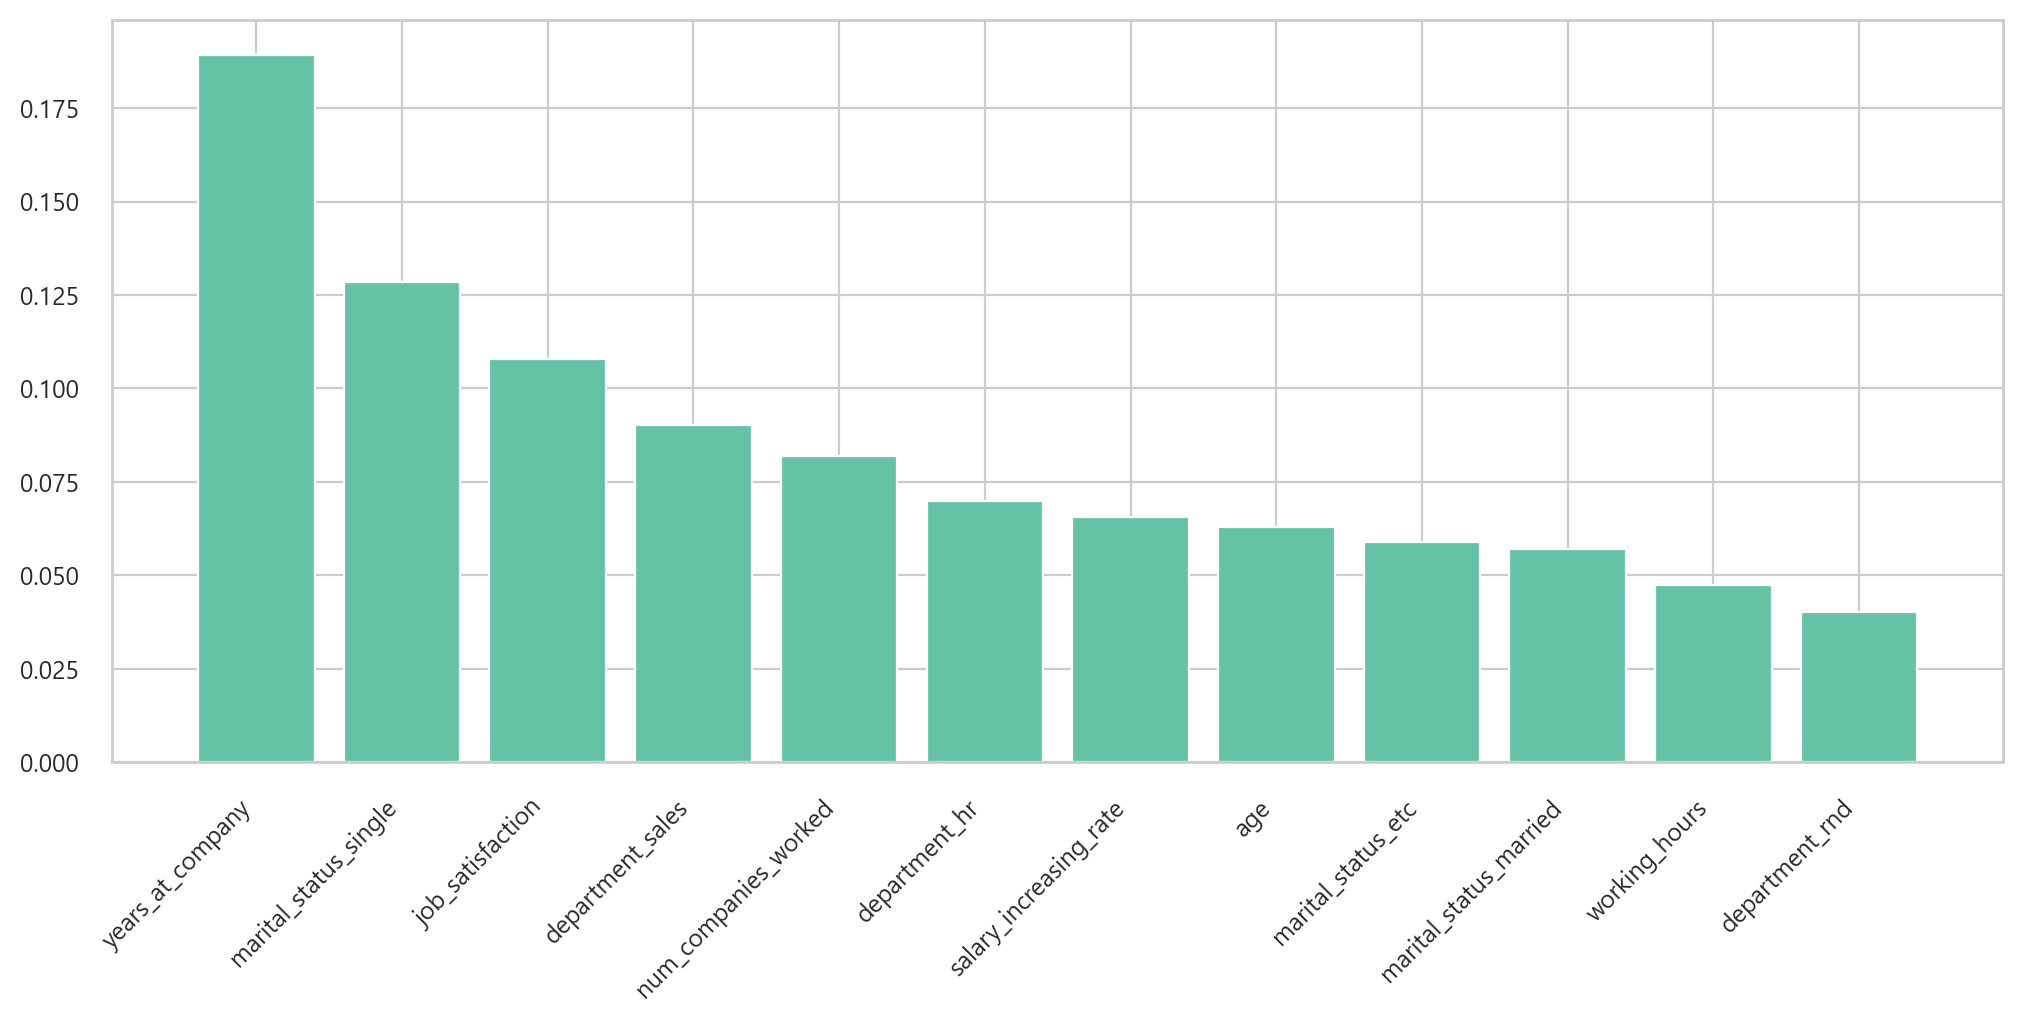

In [127]:
importances = {name: val for name, val in zip(model_best_XGB.feature_names_in_, model_best_XGB.feature_importances_)}
sorted_keys = sorted(importances, key=importances.get ,reverse=True)
sorted_values = [importances[key] for key in sorted_keys]

fig, ax = plt.subplots(1,1,figsize = (10,5))

ax.bar(sorted_keys,
       sorted_values)
plt.setp(ax.get_xticklabels(), ha = "right", rotation = 45);

In [142]:
# 퇴직자 비율
test["attrition"].sum()/len(test)

pred = [0] * len(test)

# 이 데이터의 
# 라벨의 비율이 83퍼센트이다. 그러므로 # 정확도만이 중요한 수치가 아니다
metrics.accuracy_score(pred , y_test)

0.8383561643835616

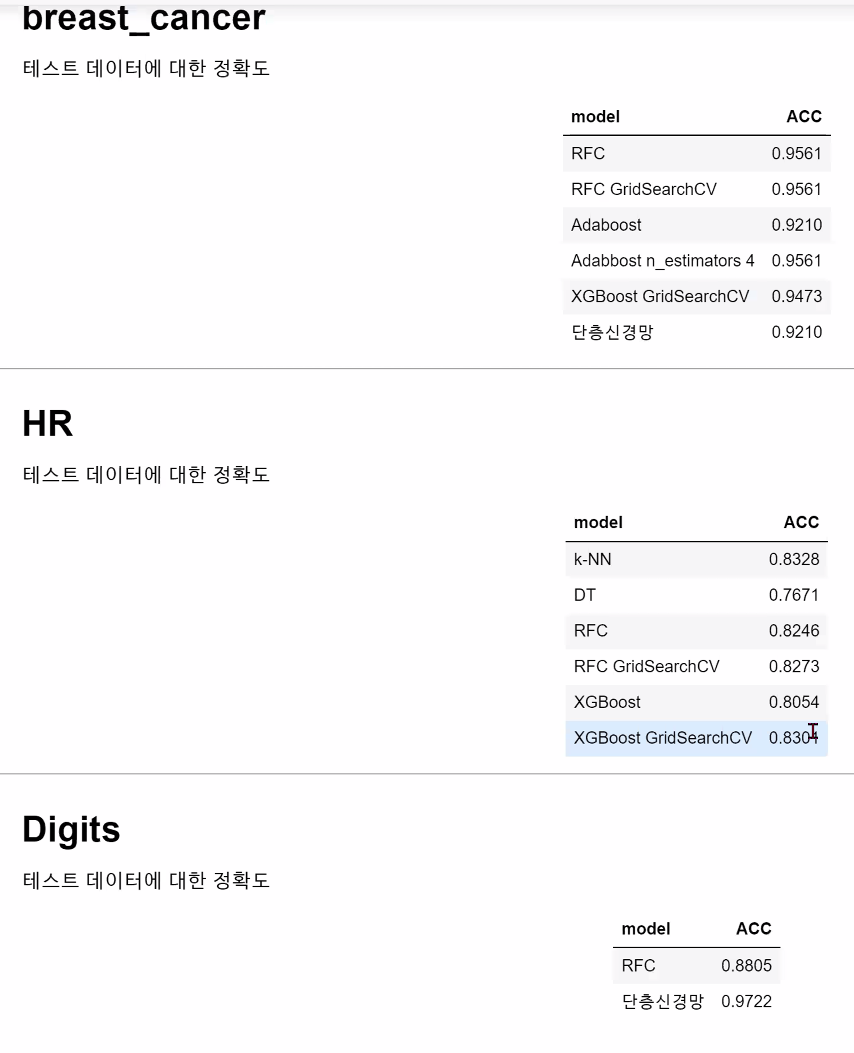